# CS 457 - Homework Assignment 5
## Name: Muhammad Khubaib  -   mk07218

In [1]:
# !pip install psycopg2-binary
import pandas as pd
import numpy as np

import psycopg2
import pandas.io.sql as psql

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connecting to PostgreSQL tables
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="1234")

In [22]:
# Reading data from the data base and loading them into pandas dataframes

df1 = psql.read_sql("SELECT * FROM EmployeeAttrition1", conn)

df2 = psql.read_sql("Select * From employeeattrition2",conn)

C:\Users\Owais\AppData\Local\Temp\ipykernel_3936\2299353911.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = psql.read_sql("SELECT * FROM EmployeeAttrition1", conn)
C:\Users\Owais\AppData\Local\Temp\ipykernel_3936\2299353911.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = psql.read_sql("Select * From employeeattrition2",conn)


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_number           1470 non-null   int64 
 1   age                       1470 non-null   int64 
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distance_from_home        1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   environmentsatisfaction   1470 non-null   int64 
 9   gender                    1470 non-null   object
 10  hourlyrate                1470 non-null   int64 
 11  jobinvolvement            1470 non-null   int64 
 12  joblevel                  1470 non-null   int64 
 13  jobrole                   1470 non-null   object
 14  jobsatisfaction         

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employeenumber  1470 non-null   int64 
 1   over18          1470 non-null   object
 2   overtime        1470 non-null   object
 3   attrition       1470 non-null   object
dtypes: int64(1), object(3)
memory usage: 46.1+ KB


<Figure size 1500x1000 with 0 Axes>

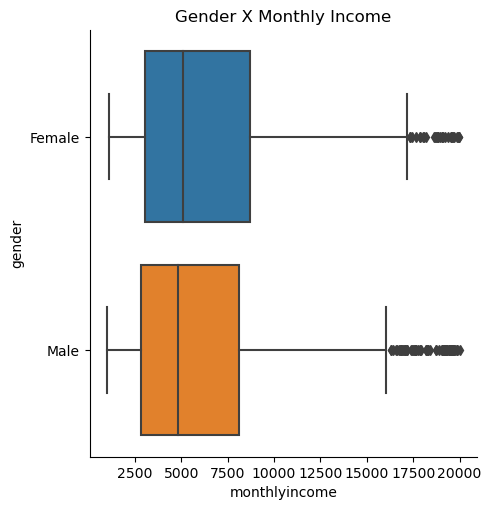

In [42]:

plt.figure(figsize=(15, 10))
sns.catplot(  x='monthlyincome', y ='gender', kind="box", data=df1)
plt.title('Gender X Monthly Income')
plt.show()

This boxplot shows that the median monthly income of females is slightly higher than that of males. But it can be seen that the monthly incomes of females is more concentrated around the median.
There are a few outliers but most are in the male group.

<Axes: >

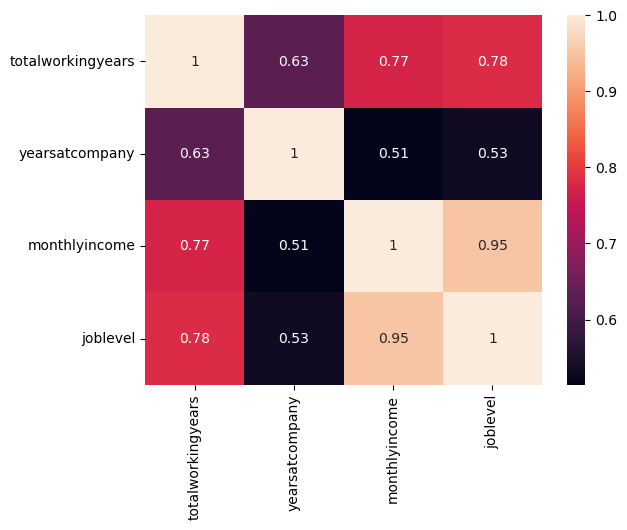

In [29]:
sns.heatmap(df1[['totalworkingyears', 'yearsatcompany', 'monthlyincome', 'joblevel']].corr(), annot=True)

The heatmap shows a positive correlation between the monthly income and the total working years of the employees indicating that the employees that have worked longer in the company have a higher monthly income; they might have recieved more promotions and they have more experience. There is also a very strong correlation between the monthly income and the joblevel; something which makes sense considering that higher jobs have more pay.

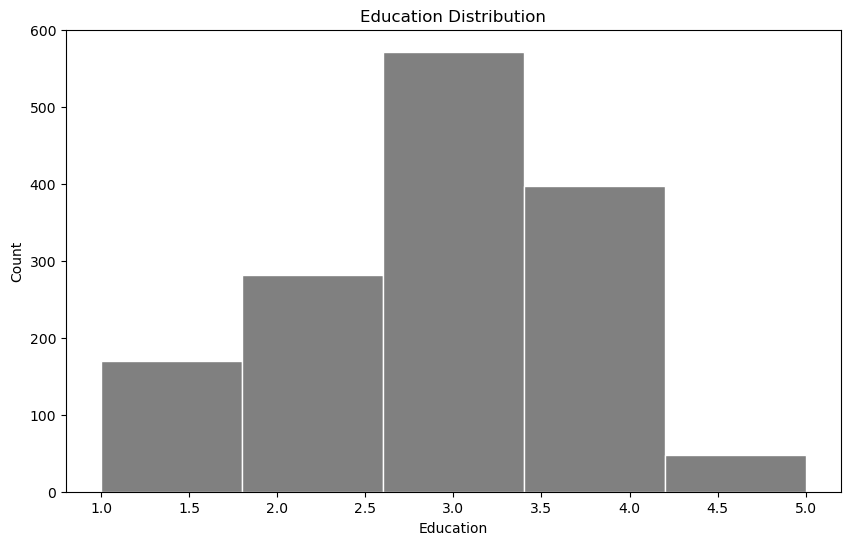

In [35]:

plt.figure(figsize=(10, 6))
plt.hist(df1['education'], bins=5, color='grey', edgecolor='white')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

As the ranking is from 1-5, it can be said that 3 represents high school level education which is the most common.
Distribution is skewed to the left, meaning more people have lower levels of education.
Overall, the population has a relatively low level of education, with very few that have higher education.